In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [71]:
# Importando libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Lendo arquivo csv
df = pd.read_csv('../data/fifa25/male_players.csv')

# Dividindo colunas que possuem dois valores
df[['Height cm', 'Height in']] = (
	df['Height'].str.split(' / ', expand=True)
)
df[['Weight kg', 'Weight lb']] = (
	df['Weight'].str.split(' / ', expand=True)
)

# Removendo colunas desnecessarias
df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'url', 'Height', 'Weight'], axis=1, inplace=True)

# Tratando valores nulos
df['play style'].fillna('Sem estilo de jogo', inplace=True)
df['GK Reflexes'].fillna(0, inplace=True)
df['GK Positioning'].fillna(0, inplace=True)
df['GK Kicking'].fillna(0, inplace=True)
df['GK Handling'].fillna(0, inplace=True)
df['GK Diving'].fillna(0, inplace=True)
df['Alternative positions'].fillna('Sem posição alternativa', inplace=True)

# Convertendo valores
df['GK Reflexes'] = df['GK Reflexes'].astype(int)
df['GK Positioning'] = df['GK Positioning'].astype(int)
df['GK Kicking'] = df['GK Kicking'].astype(int)
df['GK Handling'] = df['GK Handling'].astype(int)
df['GK Diving'] = df['GK Diving'].astype(int)

# Removendo as unidades de medida e convertendo para inteiro
df['Height cm'] = df['Height cm'].str.replace('cm', '').astype(int)
df['Weight kg'] = df['Weight kg'].str.replace('kg', '').astype(int)
df['Weight lb'] = df['Weight lb'].str.replace('lb', '').astype(int)

# Renomeando colunas
df = df.rename(columns={
    'play style': 'Play Style'
})

# ================================================================== #

# Salvando o novo arquivo tratado .csv:
df.to_csv('../data/fifa25/male_players_cleaned.csv', index=False)

C:\Users\guidf\AppData\Local\Temp\ipykernel_20224\710339697.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['play style'].fillna('Sem estilo de jogo', inplace=True)
C:\Users\guidf\AppData\Local\Temp\ipykernel_20224\710339697.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [72]:
df

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Play Style,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Height cm,Height in,Weight kg,Weight lb
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",0,0,0,0,0,182,"6'0""",75,165
1,2,Rodri,91,66,80,86,84,87,85,65,...,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",0,0,0,0,0,191,"6'3""",82,181
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,"Acrobatic+, Bruiser, Power Header, Power Shot,...",0,0,0,0,0,195,"6'5""",94,207
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,"Relentless+, Flair, Intercept, Slide Tackle, T...",0,0,0,0,0,186,"6'1""",75,165
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,"Quick Step+, Chip Shot, Finesse Shot, First To...",0,0,0,0,0,176,"5'9""",73,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16156,17717,Engson Singh,47,31,45,47,52,34,45,32,...,Sem estilo de jogo,0,0,0,0,0,169,"5'7""",62,137
16157,17717,Ousmane Sylla,47,67,38,46,45,40,55,66,...,Sem estilo de jogo,0,0,0,0,0,176,"5'9""",74,163
16158,17717,Wei Feng,47,57,47,38,50,43,49,55,...,Sem estilo de jogo,0,0,0,0,0,181,"5'11""",69,152
16159,17717,Won Hui Do,47,66,35,46,46,41,64,69,...,Sem estilo de jogo,0,0,0,0,0,187,"6'2""",71,157


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16161 entries, 0 to 16160
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   16161 non-null  int64 
 1   Name                   16161 non-null  object
 2   OVR                    16161 non-null  int64 
 3   PAC                    16161 non-null  int64 
 4   SHO                    16161 non-null  int64 
 5   PAS                    16161 non-null  int64 
 6   DRI                    16161 non-null  int64 
 7   DEF                    16161 non-null  int64 
 8   PHY                    16161 non-null  int64 
 9   Acceleration           16161 non-null  int64 
 10  Sprint Speed           16161 non-null  int64 
 11  Positioning            16161 non-null  int64 
 12  Finishing              16161 non-null  int64 
 13  Shot Power             16161 non-null  int64 
 14  Long Shots             16161 non-null  int64 
 15  Volleys            

,Name,OVR,Position,Distance
76,Riyad Mahrez,85,RM,0.127817
175,Christian Pulisic,83,RW,0.151170
16,Lionel Messi,88,RW,0.154756
55,Ousmane Dembélé,86,RW,0.154848
31,Paulo Dybala,87,CAM,0.156631
48,Rodrygo,86,RW,0.157046
197,Leon Bailey,82,RM,0.162136
189,Leandro Trossard,83,LW,0.166249
99,Kingsley Coman,84,LM,0.167659
96,Iago Aspas,84,ST,0.186785


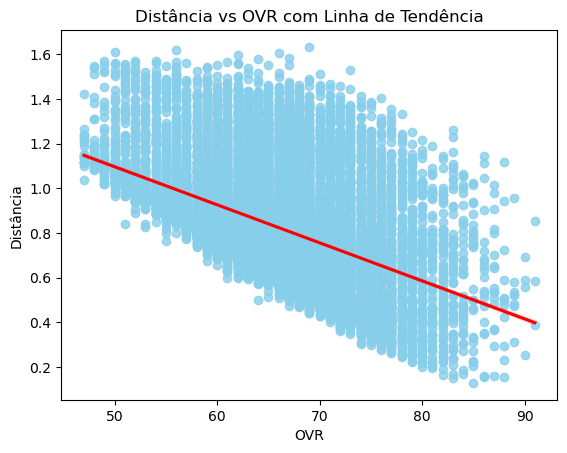

In [51]:
from sklearn.preprocessing import MinMaxScaler  # Para normalizar os dados
from scipy.spatial.distance import cdist  # Para calcular distâncias entre pontos
import matplotlib.pyplot as plt

#...# Apenas Atributos Padrões #...#

# Jogador a ser comparado:
player_name = 'Neymar Jr'

# Atributos a serem comparados
attributes = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
new_df = df[attributes].copy()

# Normalizando atributos:
scaler = MinMaxScaler() 
new_df_normalized = pd.DataFrame(scaler.fit_transform(new_df), columns=attributes)

new_df_normalized['Name'] = df['Name']
new_df_normalized['OVR'] = df['OVR']
new_df_normalized['Position'] = df['Position']

player_target = new_df_normalized[new_df_normalized['Name'] == player_name].iloc[0]
new_df_normalized = new_df_normalized[new_df_normalized['Name'] != player_name]

player_target = player_target[attributes].astype(float)

# Calcular a distância Euclidiana entre o jogador-alvo e os outros jogadores
new_df_normalized['Distance'] = cdist(
    [player_target],  # Atributos do jogador-alvo, sem o nome
    new_df_normalized[attributes].astype(float),  # Atributos dos outros jogadores
    metric='euclidean'  # Métrica de distância Euclidiana
).flatten()

similar_players = new_df_normalized.sort_values(by='Distance')

# Visualizar os 10 jogadores mais similares
top_players = similar_players[['Name', 'OVR', 'Position', 'Distance']].head(10)

display(top_players)

sns.regplot(x='OVR', y='Distance', data=similar_players, scatter_kws={'color':'skyblue'}, line_kws={'color':'red'})

plt.title('Distância vs OVR com Linha de Tendência')
plt.xlabel('OVR')
plt.ylabel('Distância')
plt.show()

,Name,OVR,Position,Distance
48,Rodrygo,86,RW,0.420763
189,Leandro Trossard,83,LW,0.440688
91,Nico Williams,85,LM,0.459706
84,Leroy Sané,85,RM,0.465920
99,Kingsley Coman,84,LM,0.467442
73,Khvicha Kvaratskhelia,85,LW,0.483408
197,Leon Bailey,82,RM,0.483409
104,Luis Díaz,84,LW,0.496079
76,Riyad Mahrez,85,RM,0.496499
160,Donyell Malen,83,RM,0.518013


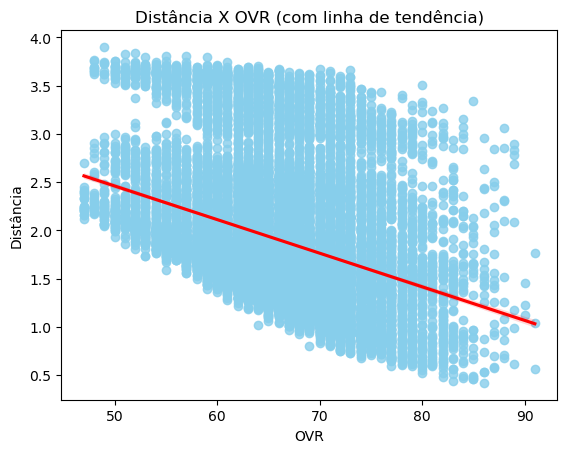

In [54]:
from sklearn.preprocessing import MinMaxScaler  # Para normalizar os dados
from scipy.spatial.distance import cdist  # Para calcular distâncias entre pontos
import matplotlib.pyplot as plt

#...# Atributos Específicos #...#

# Jogador a ser comparado:
player_name = 'Vini Jr.'

# Atributos a serem comparados
attributes = ['Acceleration', 'Sprint Speed', 'Positioning', 'Finishing', 'Shot Power', 
 'Long Shots', 'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy', 
 'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility', 'Balance', 'Reactions', 
 'Ball Control', 'Composure', 'Interceptions', 'Heading Accuracy', 'Def Awareness', 'Standing Tackle', 
 'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression']  
new_df = df[attributes].copy()

# Normalizando atributos:
scaler = MinMaxScaler() 
new_df_normalized = pd.DataFrame(scaler.fit_transform(new_df), columns=attributes)

new_df_normalized['Name'] = df['Name']
new_df_normalized['OVR'] = df['OVR']
new_df_normalized['Position'] = df['Position']

player_target = new_df_normalized[new_df_normalized['Name'] == player_name].iloc[0]
new_df_normalized = new_df_normalized[new_df_normalized['Name'] != player_name]

player_target = player_target[attributes].astype(float)

# Calcular a distância Euclidiana entre o jogador-alvo e os outros jogadores
new_df_normalized['Distance'] = cdist(
    [player_target],  # Atributos do jogador-alvo, sem o nome
    new_df_normalized[attributes].astype(float),  # Atributos dos outros jogadores
    metric='euclidean'  # Métrica de distância Euclidiana
).flatten()

similar_players = new_df_normalized.sort_values(by='Distance')

# Visualizar os 10 jogadores mais similares
top_players = similar_players[['Name', 'OVR', 'Position', 'Distance']].head(10)

display(top_players)

sns.regplot(x='OVR', y='Distance', data=similar_players, scatter_kws={'color':'skyblue'}, line_kws={'color':'red'})
plt.title('Distância X OVR (com linha de tendência)')
plt.xlabel('OVR')
plt.ylabel('Distância')
plt.show()